In [3]:
import numpy as np

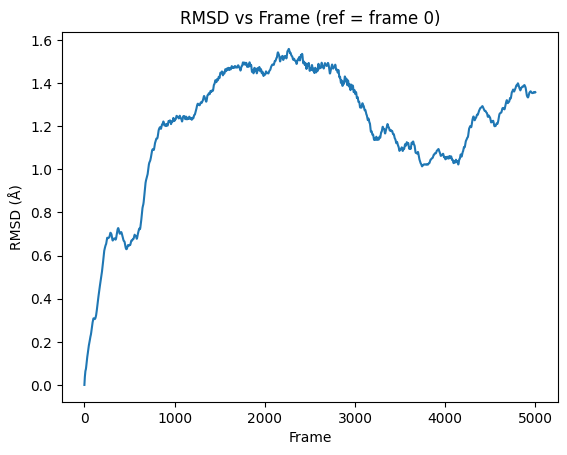

In [2]:
def rmsd(P, Q):

    diff = P - Q
    return np.sqrt((diff * diff).sum() / len(P))

# 假设 coords shape = (Nframes, Natoms, 3)
coords = np.load("./examples/phbdi/full_coord.npy")
rmsd_values = [rmsd(coords[i], coords[0]) for i in range(len(coords))]

import matplotlib.pyplot as plt
plt.plot(rmsd_values)
plt.xlabel("Frame")
plt.ylabel("RMSD (Å)")
plt.title("RMSD vs Frame (ref = frame 0)")
plt.show()


Explained variance ratio: [0.59827549 0.13828949]


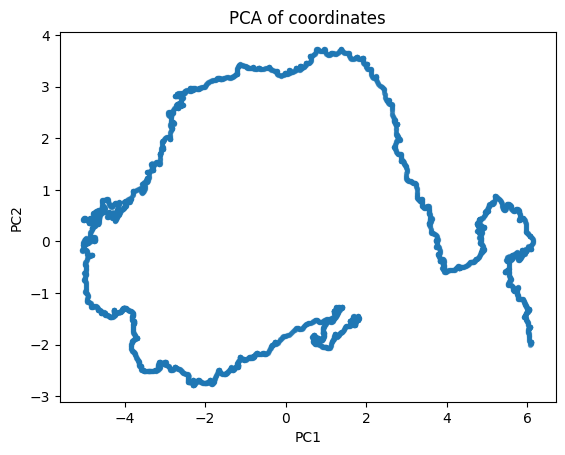

In [5]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt


nframes, natoms, _ = coords.shape

# 展平成 (Nframes, 3*Natoms)
X = coords.reshape(nframes, -1)

# 减去均值
X -= X.mean(axis=0)

# PCA
pca = PCA(n_components=2)
proj = pca.fit_transform(X)

print("Explained variance ratio:", pca.explained_variance_ratio_)

# 绘制投影
plt.scatter(proj[:,0], proj[:,1], alpha=0.5, s=8)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("PCA of coordinates")
plt.show()


In [6]:
def rmsd_value(X, Y): 
    natoms = X.shape[0]
    XtY = np.einsum('ni,nj->ij', X , Y)
    U, Sigma, Vt = np.linalg.svd(XtY)
    UVt = np.einsum('ik,kj->ij', U, Vt)
    Xprime = np.einsum('ni,ij->nj',X, UVt)
    rmsd = np.std(Xprime-Y) * np.sqrt(3)

    if 0:
        #print("XtY:", XtY)
        #print("USigmaVt:", np.einsum('ik,k,kj->ij', U, Sigma, Vt) )
        #print("U:", U)
        #print("Sigma:", Sigma)
        #print("Vt:", Vt)  
        #print("UVt=", UVt)
        #print('Xprime=', Xprime)
        sum = 0.0
        for i in range(0, natoms):
            for j in range(0, 3):
                sum += (Xprime[i,j]-Y[i,j])**2/natoms
        rmsd2 = np.sqrt(sum) 
        print("rmsd: ", rmsd, rmsd2)

    return rmsd, Xprime 

In [7]:
coords = np.load("./examples/phbdi/full_coord.npy")
X = coords[1]
Y = coords[2]

In [23]:
def rmsd(P, Q):

    diff = P - Q
    return np.sqrt((diff * diff).sum() / len(P))

# 假设 coords shape = (Nframes, Natoms, 3)
coords = np.load("./examples/phbdi/full_coord.npy")
rmsd_values = [rmsd_value(coords[i], coords[500])[0] for i in range(len(coords))]


In [24]:
rmsd_values

[np.float64(0.6215350056327338),
 np.float64(0.6193398503593794),
 np.float64(0.6173656599917339),
 np.float64(0.6156568075641239),
 np.float64(0.6142825563263954),
 np.float64(0.6134281917934863),
 np.float64(0.6128569386839896),
 np.float64(0.61252259412869),
 np.float64(0.6122322673232375),
 np.float64(0.6118145505946254),
 np.float64(0.611176744757955),
 np.float64(0.6100911818983368),
 np.float64(0.6085071071039344),
 np.float64(0.6063843174817668),
 np.float64(0.6038685362443019),
 np.float64(0.6008940532236915),
 np.float64(0.597646628947371),
 np.float64(0.5944430028538454),
 np.float64(0.5914094861269569),
 np.float64(0.5888127863492297),
 np.float64(0.5862872386162448),
 np.float64(0.5840818054161704),
 np.float64(0.5822678564033597),
 np.float64(0.5807885593897637),
 np.float64(0.5797836141591006),
 np.float64(0.5788970784107329),
 np.float64(0.5781522772292198),
 np.float64(0.5771819742050392),
 np.float64(0.5761174701361687),
 np.float64(0.5747314710821845),
 np.float64(0.

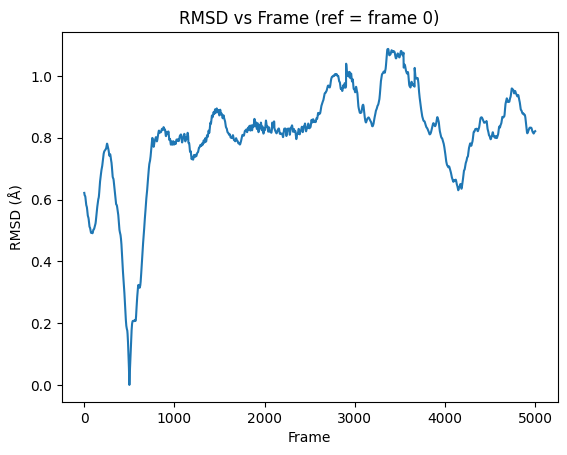

In [25]:
import matplotlib.pyplot as plt
plt.plot(rmsd_values)
plt.xlabel("Frame")
plt.ylabel("RMSD (Å)")
plt.title("RMSD vs Frame (ref = frame 0)")
plt.show()
